In [142]:
# census API Key: 2c883bc405bc2938e2971f8c9e53ca3621331460
# Essex county FIPS = 34013
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 100)
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
import mapclassify as mc
from census import Census
from us import states

In [143]:
c = Census("2c883bc405bc2938e2971f8c9e53ca3621331460")

## Downloading Census Variables of Interest


1. Downloading census variables of interest
2000 -- SF3

P087001 Total: Population for whom poverty status is determined
P087002 Total: Income in 1999 below poverty level:
P053001 Median household income in 1999 Households
2000 -- SF1

P009001 RACE:Total tallied
P009002 RACE:talllied:White or in comb w/ 1+ oth races
P009003 RACE:tallied:Bl/AfAm or in comb w/ 1+ oth races

H004001 TENURE:Housing Units:Total
H004003 TENURE:Housing Units:Renter occupied
maybe:
H003001 OCCUPANCY STATUS:Housing Units:Total
H003003 OCCUPANCY STATUS:Housing Units:Vacant
2010 -- SF1

P006001 Total races tallied
P006002 Total races tallied!!White alone or in combination with one or more other races
P006003 Total races tallied!!Black or African American alone or in combination with one or more other races

H004001 Total
H004004 Total!!Renter occupied

maybe:
H003001 Total
H003003 Total!!Vacant
2012 -- ACS 5year

B17001_001E Estimate!!Total (POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE)
B17001_002E Estimate!!Total!!Income in the past 12 months below poverty level

B19013_001E Estimate!!Median household income in the past 12 months (in 2012 inflation-adjusted dollars)


In [144]:
c.acs5.tables(year=2012)

[{'name': 'B17015',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B17015.json'},
 {'name': 'B18104',
  'description': 'SEX BY AGE BY COGNITIVE DIFFICULTY',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B18104.json'},
 {'name': 'B17016',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B17016.json'},
 {'name': 'B18105',
  'description': 'SEX BY AGE BY AMBULATORY DIFFICULTY',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B18105.json'},
 {'name': 'B17017',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/gro

In [145]:
# 2012 ACS 5 year
poverty_income_2012 = c.acs5.get(("B17001_001E","B17001_002E","B19013_001E"),geo={'for':'tract:*','in':'state:{} county:013'.format(states.NJ.fips)},year=2012)
# 2010 SF1
pop_race_housing_2010 = c.sf1.get(("P006001",'P006002','P006003','H004001','H004004','H003001','H003003'),geo={'for':'tract:*','in':'state:{} county:013'.format(states.NJ.fips)},year=2010)
# # 2000 SF1
#pop_race_housing_2000 = c.sf1.get(("P009001",'P009002','P009003','H004001','H004003','H003001','H003003'),geo={'for':'tract:*',
 #                                       'in':'state:{} county:101'.format(states.PA.fips)},year=2000)

# # 2000 SF3
#poverty_income_2000 = c.sf3.get(("P087001",'P087002','P053001'),geo={'for':'tract:*',
 #                                      'in':'state:{} county:101'.format(states.PA.fips)},year=2000)

In [146]:
poverty_income_2012

[{'B17001_001E': 3813.0,
  'B17001_002E': 232.0,
  'B19013_001E': 74213.0,
  'state': '34',
  'county': '013',
  'tract': '015500'},
 {'B17001_001E': 5482.0,
  'B17001_002E': 683.0,
  'B19013_001E': 59152.0,
  'state': '34',
  'county': '013',
  'tract': '015900'},
 {'B17001_001E': 3069.0,
  'B17001_002E': 66.0,
  'B19013_001E': 164688.0,
  'state': '34',
  'county': '013',
  'tract': '016100'},
 {'B17001_001E': 3633.0,
  'B17001_002E': 171.0,
  'B19013_001E': 121829.0,
  'state': '34',
  'county': '013',
  'tract': '014800'},
 {'B17001_001E': 4793.0,
  'B17001_002E': 113.0,
  'B19013_001E': 77172.0,
  'state': '34',
  'county': '013',
  'tract': '013900'},
 {'B17001_001E': 5830.0,
  'B17001_002E': 184.0,
  'B19013_001E': 64286.0,
  'state': '34',
  'county': '013',
  'tract': '014300'},
 {'B17001_001E': 6580.0,
  'B17001_002E': 1161.0,
  'B19013_001E': 54124.0,
  'state': '34',
  'county': '013',
  'tract': '014700'},
 {'B17001_001E': 3428.0,
  'B17001_002E': 161.0,
  'B19013_001E': 8

## Formatting Census Variables

In [208]:
# converting all dictionaries (format on download) to dataframes
poverty_income_2012_pd = pd.DataFrame(poverty_income_2012)
pop_race_housing_2010_pd = pd.DataFrame(pop_race_housing_2010)
#pop_race_housing_2000_pd = pd.DataFrame(pop_race_housing_2000)
#poverty_income_2000_pd = pd.DataFrame(poverty_income_2000)



In [209]:


# defining columns names with descriptive headers
#sf32000_cols = {'P087001':'pop_tot_pov','P087002':'in_poverty','P053001':'median_hh'}
#sf12000_cols = {'P009001':'pop_tot_race','P009002':'white_tot','P009003':'black_tot',
#                'H004001':'housing_units_occ','H004003':'housing_renters',
#                'H003001':'housing_units_tot','H003003':'housing_units_vac'}

acs2012_cols = {'B17001_001E':'pop_tot_pov','B17001_002E':'in_poverty','B19013_001E':'median_hh'}
sf12010_cols = {'P006001':'pop_tot_race','P006002':'white_tot','P006003':'black_tot',
                'H004001':'housing_units_occ','H004004':'housing_renters',
                'H003001':'housing_units_tot','H003003':'housing_units_vac'}



In [210]:
poverty_income_2012_pd = poverty_income_2012_pd.rename(columns = acs2012_cols)
pop_race_housing_2010_pd = pop_race_housing_2010_pd.rename(columns =sf12010_cols)
#pop_race_housing_2000_pd = pop_race_housing_2000_pd.rename(columns=sf12000_cols)
#poverty_income_2000_pd = poverty_income_2000_pd.rename(columns = sf32000_cols)

In [211]:
poverty_income_2012_pd['median_hh'] = poverty_income_2012_pd.apply(
    lambda x: 1 if x['median_hh']==-666666666.0 else x['median_hh'],axis=1)

In [212]:
#stats2000 = pop_race_housing_2000_pd.merge(poverty_income_2000_pd,how="left",left_on='tract', right_on='tract')
stats2010 = pop_race_housing_2010_pd.merge(poverty_income_2012_pd, how="left",left_on='tract',right_on='tract')

In [213]:
# creating geoID fields 
#stats2000['STFID']=stats2000["state_x"].astype(str) + stats2000[
#    "county_x"].astype(str) + stats2000["tract"].astype(str)
stats2010['GEOID']=stats2010["state_x"].astype(str) + stats2010[
    "county_x"].astype(str) + stats2010["tract"].astype(str)



In [214]:
stats2010 = stats2010.drop(columns=['state_x','state_y','county_x','county_y','tract'])
#stats2000 = stats2000.drop(columns=['state_x','state_y','county_x','county_y','tract'])

In [215]:
# calculating percentages

#stats2000['per_white'] = stats2000['white_tot'].astype('int64')/stats2000['pop_tot_race'].astype('int64')
#stats2000['per_black']= stats2000['black_tot'].astype('int64')/stats2000['pop_tot_race'].astype('int64')
#stats2000['per_renters'] = stats2000['housing_renters'].astype('int64')/stats2000['housing_units_occ'].astype('int64')
#stats2000['per_vacant']= stats2000['housing_units_vac'].astype('int64')/stats2000['housing_units_tot'].astype('int64')
#stats2000['per_poverty']= stats2000['in_poverty'].astype('int64')/stats2000['pop_tot_pov'].astype('int64')

stats2010['per_white'] = stats2010['white_tot'].astype('int64')/stats2010['pop_tot_race'].astype('int64')
stats2010['per_black']= stats2010['black_tot'].astype('int64')/stats2010['pop_tot_race'].astype('int64')
stats2010['per_renters'] = stats2010['housing_renters'].astype('int64')/stats2010['housing_units_occ'].astype('int64')
stats2010['per_vacant']= stats2010['housing_units_vac'].astype('int64')/stats2010['housing_units_tot'].astype('int64')
stats2010['per_poverty']= stats2010['in_poverty'].astype('int64')/stats2010['pop_tot_pov'].astype('int64')



In [216]:
# loading morans hh counts
morans_hh = gpd.read_file("data/morans_hh_blocks.geojson")

In [217]:
# loading and reprojecting census tracts
tracts = gpd.read_file("data/newark_tracts/newarktractpolygon.geojson")
tracts = tracts.to_crs('epsg:3424')

In [218]:
morans_hh

,GEOID,institutional_investor_rental2000,institutional_investor_rental2001,institutional_investor_rental2002,institutional_investor_rental2003,institutional_investor_rental2004,institutional_investor_rental2005,institutional_investor_rental2006,institutional_investor_rental2007,institutional_investor_rental2008,institutional_investor_rental2009,institutional_investor_rental2010,institutional_investor_rental2011,institutional_investor_rental2012,institutional_investor_rental2013,institutional_investor_rental2014,institutional_investor_rental2015,institutional_investor_rental2016,institutional_investor_rental2017,institutional_investor_rental2018,institutional_investor_rental2019,institutional_investor_rental2020,non_institutional_investor_rental2000,non_institutional_investor_rental2001,non_institutional_investor_rental2002,non_institutional_investor_rental2003,non_institutional_investor_rental2004,non_institutional_investor_rental2005,non_institutional_investor_rental2006,non_institutional_investor_rental2007,non_institutional_investor_rental2008,non_institutional_investor_rental2009,non_institutional_investor_rental2010,non_institutional_investor_rental2011,non_institutional_investor_rental2012,non_institutional_investor_rental2013,non_institutional_investor_rental2014,non_institutional_investor_rental2015,non_institutional_investor_rental2016,non_institutional_investor_rental2017,non_institutional_investor_rental2018,non_institutional_investor_rental2019,non_institutional_investor_rental2020,institutional_investor_flip2000,institutional_investor_flip2001,institutional_investor_flip2002,institutional_investor_flip2003,institutional_investor_flip2004,institutional_investor_flip2005,institutional_investor_flip2006,...,inst_inv_rent_hh17,non_inst_inv_rent_hh17,inst_inv_flip_hh17,non_inst_inv_flip_hh17,non_inv_hh17,inst_inv_rent_hh18,non_inst_inv_rent_hh18,inst_inv_flip_hh18,non_inst_inv_flip_hh18,non_inv_hh18,overlap00,overlap01,overlap02,overlap03,overlap04,overlap05,overlap06,overlap07,overlap08,overlap09,overlap10,overlap11,overlap12,overlap13,overlap14,overlap15,overlap16,overlap17,overlap18,inst_inv_rent_00_06,inst_inv_rent_07_09,inst_inv_rent_10_13,inst_inv_rent_14_18,non_inst_inv_rent_00_06,non_inst_inv_rent_07_09,non_inst_inv_rent_10_13,non_inst_inv_rent_14_18,inst_inv_flip_00_06,inst_inv_flip_07_09,inst_inv_flip_10_13,inst_inv_flip_14_18,non_inst_inv_flip_00_06,non_inst_inv_flip_07_09,non_inst_inv_flip_10_13,non_inst_inv_flip_14_18,non_inv_00_06,non_inv_07_09,non_inv_10_13,non_inv_14_18,geometry
0,340130051003001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((573138.198 685768.846, 573142...."
1,340130051001004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((573169.068 685821.408, 573186...."
2,340130051003002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((573106.498 685715.553, 573118...."
3,340130051001008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,Fals

In [219]:
morans_hh_sel = morans_hh[['institutional_investor_rental2000','institutional_investor_rental2001','institutional_investor_rental2002','institutional_investor_rental2003',
                           'institutional_investor_rental2004','institutional_investor_rental2005','institutional_investor_rental2006','institutional_investor_rental2007',
                           'institutional_investor_rental2008','institutional_investor_rental2009','institutional_investor_rental2010','institutional_investor_rental2011',
                           'institutional_investor_rental2012','institutional_investor_rental2013','institutional_investor_rental2014','institutional_investor_rental2015',
                           'institutional_investor_rental2016','institutional_investor_rental2017','institutional_investor_rental2018',
                          'non_institutional_investor_rental2000','non_institutional_investor_rental2001','non_institutional_investor_rental2002','non_institutional_investor_rental2003',
                           'non_institutional_investor_rental2004','non_institutional_investor_rental2005','non_institutional_investor_rental2006','non_institutional_investor_rental2007',
                           'non_institutional_investor_rental2008','non_institutional_investor_rental2009','non_institutional_investor_rental2010','non_institutional_investor_rental2011',
                           'non_institutional_investor_rental2012','non_institutional_investor_rental2013','non_institutional_investor_rental2014','non_institutional_investor_rental2015',
                           'non_institutional_investor_rental2016','non_institutional_investor_rental2017','non_institutional_investor_rental2018',
                          'institutional_investor_flip2000','institutional_investor_flip2001','institutional_investor_flip2002','institutional_investor_flip2003',
                           'institutional_investor_flip2004','institutional_investor_flip2005','institutional_investor_flip2006','institutional_investor_flip2007',
                           'institutional_investor_flip2008','institutional_investor_flip2009','institutional_investor_flip2010','institutional_investor_flip2011',
                           'institutional_investor_flip2012','institutional_investor_flip2013','institutional_investor_flip2014','institutional_investor_flip2015',
                           'institutional_investor_flip2016','institutional_investor_flip2017','institutional_investor_flip2018',
                          'non_institutional_investor_flip2000','non_institutional_investor_flip2001','non_institutional_investor_flip2002','non_institutional_investor_flip2003',
                           'non_institutional_investor_flip2004','non_institutional_investor_flip2005','non_institutional_investor_flip2006','non_institutional_investor_flip2007',
                           'non_institutional_investor_flip2008','non_institutional_investor_flip2009','non_institutional_investor_flip2010','non_institutional_investor_flip2011',
                           'non_institutional_investor_flip2012','non_institutional_investor_flip2013','non_institutional_investor_flip2014','non_institutional_investor_flip2015',
                           'non_institutional_investor_flip2016','non_institutional_investor_flip2017','non_institutional_investor_flip2018',
                          'non_investor2000','non_investor2001','non_investor2002','non_investor2003',
                           'non_investor2004','non_investor2005','non_investor2006','non_investor2007',
                           'non_investor2008','non_investor2009','non_investor2010','non_investor2011',
                           'non_investor2012','non_investor2013','non_investor2014','non_investor2015',
                           'non_investor2016','non_investor2017','non_investor2018','geometry']].copy()

In [220]:
morans_hh_sel_grouped_years = morans_hh[['inst_inv_rent_00_06','inst_inv_rent_07_09','inst_inv_rent_10_13','inst_inv_rent_14_18',
                           'non_inst_inv_rent_00_06','non_inst_inv_rent_07_09','non_inst_inv_rent_10_13','non_inst_inv_rent_14_18',
                           'inst_inv_flip_00_06','inst_inv_flip_07_09','inst_inv_flip_10_13','inst_inv_flip_14_18',
                           'non_inst_inv_flip_00_06','non_inst_inv_flip_07_09','non_inst_inv_flip_10_13','non_inst_inv_flip_14_18',
                           'non_inv_00_06','non_inv_07_09','non_inv_10_13','non_inv_14_18',
                           'geometry']].copy()

In [221]:
# spatial join of morans hh clusters to tracts
tract_summary = gpd.sjoin(tracts,morans_hh_sel,how='left',op='intersects')

In [222]:
tract_summary_grouped_years = gpd.sjoin(tracts, morans_hh_sel_grouped_years,how='left',op='intersects')

In [223]:
# grouping by tract ID and getting max value (for non weighted version of statistics)
hh_tracts = tract_summary.groupby('GEOID').agg({'institutional_investor_rental2000':'max','institutional_investor_rental2001':'max','institutional_investor_rental2002':'max','institutional_investor_rental2003':'max',
                           'institutional_investor_rental2004':'max','institutional_investor_rental2005':'max','institutional_investor_rental2006':'max','institutional_investor_rental2007':'max',
                           'institutional_investor_rental2008':'max','institutional_investor_rental2009':'max','institutional_investor_rental2010':'max','institutional_investor_rental2011':'max',
                           'institutional_investor_rental2012':'max','institutional_investor_rental2013':'max','institutional_investor_rental2014':'max','institutional_investor_rental2015':'max',
                           'institutional_investor_rental2016':'max','institutional_investor_rental2017':'max','institutional_investor_rental2018':'max',
                          'non_institutional_investor_rental2000':'max','non_institutional_investor_rental2001':'max','non_institutional_investor_rental2002':'max','non_institutional_investor_rental2003':'max',
                           'non_institutional_investor_rental2004':'max','non_institutional_investor_rental2005':'max','non_institutional_investor_rental2006':'max','non_institutional_investor_rental2007':'max',
                           'non_institutional_investor_rental2008':'max','non_institutional_investor_rental2009':'max','non_institutional_investor_rental2010':'max','non_institutional_investor_rental2011':'max',
                           'non_institutional_investor_rental2012':'max','non_institutional_investor_rental2013':'max','non_institutional_investor_rental2014':'max','non_institutional_investor_rental2015':'max',
                           'non_institutional_investor_rental2016':'max','non_institutional_investor_rental2017':'max','non_institutional_investor_rental2018':'max',
                          'institutional_investor_flip2000':'max','institutional_investor_flip2001':'max','institutional_investor_flip2002':'max','institutional_investor_flip2003':'max',
                           'institutional_investor_flip2004':'max','institutional_investor_flip2005':'max','institutional_investor_flip2006':'max','institutional_investor_flip2007':'max',
                           'institutional_investor_flip2008':'max','institutional_investor_flip2009':'max','institutional_investor_flip2010':'max','institutional_investor_flip2011':'max',
                           'institutional_investor_flip2012':'max','institutional_investor_flip2013':'max','institutional_investor_flip2014':'max','institutional_investor_flip2015':'max',
                           'institutional_investor_flip2016':'max','institutional_investor_flip2017':'max','institutional_investor_flip2018':'max',
                          'non_institutional_investor_flip2000':'max','non_institutional_investor_flip2001':'max','non_institutional_investor_flip2002':'max','non_institutional_investor_flip2003':'max',
                           'non_institutional_investor_flip2004':'max','non_institutional_investor_flip2005':'max','non_institutional_investor_flip2006':'max','non_institutional_investor_flip2007':'max',
                           'non_institutional_investor_flip2008':'max','non_institutional_investor_flip2009':'max','non_institutional_investor_flip2010':'max','non_institutional_investor_flip2011':'max',
                           'non_institutional_investor_flip2012':'max','non_institutional_investor_flip2013':'max','non_institutional_investor_flip2014':'max','non_institutional_investor_flip2015':'max',
                           'non_institutional_investor_flip2016':'max','non_institutional_investor_flip2017':'max','non_institutional_investor_flip2018':'max',
                          'non_investor2000':'max','non_investor2001':'max','non_investor2002':'max','non_investor2003':'max',
                           'non_investor2004':'max','non_investor2005':'max','non_investor2006':'max','non_investor2007':'max',
                           'non_investor2008':'max','non_investor2009':'max','non_investor2010':'max','non_investor2011':'max',
                           'non_investor2012':'max','non_investor2013':'max','non_investor2014':'max','non_investor2015':'max',
                           'non_investor2016':'max','non_investor2017':'max','non_investor2018':'max'})

In [224]:
hh_tracts_grouped_years = tract_summary_grouped_years.groupby('GEOID').agg({
                           'inst_inv_rent_00_06':'max','inst_inv_rent_07_09':'max','inst_inv_rent_10_13':'max','inst_inv_rent_14_18':'max',
                           'non_inst_inv_rent_00_06':'max','non_inst_inv_rent_07_09':'max','non_inst_inv_rent_10_13':'max','non_inst_inv_rent_14_18':'max',
                           'inst_inv_flip_00_06':'max','inst_inv_flip_07_09':'max','inst_inv_flip_10_13':'max','inst_inv_flip_14_18':'max',
                           'non_inst_inv_flip_00_06':'max','non_inst_inv_flip_07_09':'max','non_inst_inv_flip_10_13':'max','non_inst_inv_flip_14_18':'max',
                           'non_inv_00_06':'max','non_inv_07_09':'max','non_inv_10_13':'max','non_inv_14_18':'max'
                           })

In [225]:
# joining stats to tracts with morans results files based on geo ids
morans_hh_census = hh_tracts.merge(stats2010, how = "left", 
                                            left_on="GEOID",right_on="GEOID").reset_index()


In [226]:
morans_hh_census_grouped_years = hh_tracts_grouped_years.merge(stats2010, how='left',left_on='GEOID',right_on='GEOID').reset_index()

In [227]:
# converting median hh to integer, data type issue
morans_hh_census['median_hh'] = morans_hh_census['median_hh'].astype('int64')

In [228]:
# converting median hh to integer, data type issue
morans_hh_census_grouped_years['median_hh'] = morans_hh_census_grouped_years['median_hh'].astype('int64')

In [229]:
morans_hh_census_grouped_years

,index,GEOID,inst_inv_rent_00_06,inst_inv_rent_07_09,inst_inv_rent_10_13,inst_inv_rent_14_18,non_inst_inv_rent_00_06,non_inst_inv_rent_07_09,non_inst_inv_rent_10_13,non_inst_inv_rent_14_18,inst_inv_flip_00_06,inst_inv_flip_07_09,inst_inv_flip_10_13,inst_inv_flip_14_18,non_inst_inv_flip_00_06,non_inst_inv_flip_07_09,non_inst_inv_flip_10_13,non_inst_inv_flip_14_18,non_inv_00_06,non_inv_07_09,non_inv_10_13,non_inv_14_18,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,per_white,per_black,per_renters,per_vacant,per_poverty
0,0,34013000100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6220.0,2711.0,1328.0,2315.0,1624.0,2478.0,163.0,6288.0,854.0,38750,0.435852,0.213505,0.701512,0.065779,0.135814
1,1,34013000200,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,3053.0,1294.0,570.0,1166.0,1015.0,1311.0,145.0,2947.0,801.0,22480,0.423845,0.186702,0.870497,0.110603,0.271802
2,2,34013000300,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,3544.0,1321.0,1075.0,1450.0,1254.0,1642.0,192.0,3178.0,860.0,20899,0.372743,0.303330,0.864828,0.116931,0.270610
3,3,34013000400,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,2459.0,1306.0,222.0,770.0,538.0,857.0,87.0,2732.0,503.0,42750,0.531110,0.090281,0.698701,0.101517,0.184114
4,4,34013000500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1872.0,858.0,221.0,551.0,409.0,591.0,40.0,2234.0,481.0,53816,0.458333,0.118056,0.742287,0.067682,0.215309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,34013023000,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,3337.0,314.0,2702.0,1143.0,994.0,1250.0,107.0,2681.0,1223.0,16033,0.094096,0.809709,0.869641,0.085600,0.456173
84,84,34013023100,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,2553.0,85.0,2310.0,759.0,607.0,907.0,148.0,2294.0,833.0,38690,0.033294,0.904818,0.799736,0.163175,0.363121
85,85,34013023200,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,3518.0,364.0,2831.0,1144.0,1006.0,1335.0,191.0,3681.0,1458.0,23267,0.103468,0.804719,0.879371,0.143071,0.396088
86,86,34013980100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3571.0,780.0,2516.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.218426,0.704565,NaN,NaN,NaN


## creating a summary table of mean and standard deviations by year groupings

In [230]:
#institutional investor rentals
inst_inv_r_sum_2000 = morans_hh_census.groupby("institutional_investor_rental2000").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2001 = morans_hh_census.groupby("institutional_investor_rental2001").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2002 = morans_hh_census.groupby("institutional_investor_rental2002").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2003 = morans_hh_census.groupby("institutional_investor_rental2003").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2004 = morans_hh_census.groupby("institutional_investor_rental2004").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2005 = morans_hh_census.groupby("institutional_investor_rental2005").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2006 = morans_hh_census.groupby("institutional_investor_rental2006").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2007 = morans_hh_census.groupby("institutional_investor_rental2007").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2008 = morans_hh_census.groupby("institutional_investor_rental2008").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2009 = morans_hh_census.groupby("institutional_investor_rental2009").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2010 = morans_hh_census.groupby("institutional_investor_rental2010").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2011 = morans_hh_census.groupby("institutional_investor_rental2011").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2012 = morans_hh_census.groupby("institutional_investor_rental2012").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2013 = morans_hh_census.groupby("institutional_investor_rental2013").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2014 = morans_hh_census.groupby("institutional_investor_rental2014").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2015 = morans_hh_census.groupby("institutional_investor_rental2015").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2016 = morans_hh_census.groupby("institutional_investor_rental2016").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2017 = morans_hh_census.groupby("institutional_investor_rental2017").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_2018 = morans_hh_census.groupby("institutional_investor_rental2018").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [231]:
#institutional investor rentals
inst_inv_r_sum_00_06 = morans_hh_census_grouped_years.groupby("inst_inv_rent_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_07_09 = morans_hh_census_grouped_years.groupby("inst_inv_rent_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_10_13 = morans_hh_census_grouped_years.groupby("inst_inv_rent_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_14_18 = morans_hh_census_grouped_years.groupby("inst_inv_rent_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [232]:
#non-institutional investor rentals
non_inst_inv_r_sum_2000 = morans_hh_census.groupby("non_institutional_investor_rental2000").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2001 = morans_hh_census.groupby("non_institutional_investor_rental2001").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2002 = morans_hh_census.groupby("non_institutional_investor_rental2002").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2003 = morans_hh_census.groupby("non_institutional_investor_rental2003").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2004 = morans_hh_census.groupby("non_institutional_investor_rental2004").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2005 = morans_hh_census.groupby("non_institutional_investor_rental2005").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2006 = morans_hh_census.groupby("non_institutional_investor_rental2006").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2007 = morans_hh_census.groupby("non_institutional_investor_rental2007").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2008 = morans_hh_census.groupby("non_institutional_investor_rental2008").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2009 = morans_hh_census.groupby("non_institutional_investor_rental2009").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2010 = morans_hh_census.groupby("non_institutional_investor_rental2010").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2011 = morans_hh_census.groupby("non_institutional_investor_rental2011").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2012 = morans_hh_census.groupby("non_institutional_investor_rental2012").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2013 = morans_hh_census.groupby("non_institutional_investor_rental2013").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2014 = morans_hh_census.groupby("non_institutional_investor_rental2014").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2015 = morans_hh_census.groupby("non_institutional_investor_rental2015").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2016 = morans_hh_census.groupby("non_institutional_investor_rental2016").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2017 = morans_hh_census.groupby("non_institutional_investor_rental2017").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_2018 = morans_hh_census.groupby("non_institutional_investor_rental2018").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [233]:
#non institutional investor rentals
non_inst_inv_r_sum_00_06 = morans_hh_census_grouped_years.groupby("non_inst_inv_rent_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_07_09 = morans_hh_census_grouped_years.groupby("non_inst_inv_rent_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_10_13 = morans_hh_census_grouped_years.groupby("non_inst_inv_rent_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_14_18 = morans_hh_census_grouped_years.groupby("non_inst_inv_rent_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [234]:
#institutional investor flips
inst_inv_f_sum_2000 = morans_hh_census.groupby("institutional_investor_flip2000").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2001 = morans_hh_census.groupby("institutional_investor_flip2001").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2002 = morans_hh_census.groupby("institutional_investor_flip2002").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2003 = morans_hh_census.groupby("institutional_investor_flip2003").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2004 = morans_hh_census.groupby("institutional_investor_flip2004").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2005 = morans_hh_census.groupby("institutional_investor_flip2005").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2006 = morans_hh_census.groupby("institutional_investor_flip2006").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2007 = morans_hh_census.groupby("institutional_investor_flip2007").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2008 = morans_hh_census.groupby("institutional_investor_flip2008").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2009 = morans_hh_census.groupby("institutional_investor_flip2009").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2010 = morans_hh_census.groupby("institutional_investor_flip2010").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2011 = morans_hh_census.groupby("institutional_investor_flip2011").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2012 = morans_hh_census.groupby("institutional_investor_flip2012").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2013 = morans_hh_census.groupby("institutional_investor_flip2013").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2014 = morans_hh_census.groupby("institutional_investor_flip2014").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2015 = morans_hh_census.groupby("institutional_investor_flip2015").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2016 = morans_hh_census.groupby("institutional_investor_flip2016").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2017 = morans_hh_census.groupby("institutional_investor_flip2017").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_2018 = morans_hh_census.groupby("institutional_investor_flip2018").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [235]:
#institutional investor flips
inst_inv_f_sum_00_06 = morans_hh_census_grouped_years.groupby("inst_inv_flip_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_07_09 = morans_hh_census_grouped_years.groupby("non_inst_inv_flip_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_10_13 = morans_hh_census_grouped_years.groupby("non_inst_inv_flip_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_14_18 = morans_hh_census_grouped_years.groupby("non_inst_inv_flip_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [236]:
#non-institutional investor rentals
non_inst_inv_f_sum_2000 = morans_hh_census.groupby("non_institutional_investor_flip2000").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2001 = morans_hh_census.groupby("non_institutional_investor_flip2001").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2002 = morans_hh_census.groupby("non_institutional_investor_flip2002").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2003 = morans_hh_census.groupby("non_institutional_investor_flip2003").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2004 = morans_hh_census.groupby("non_institutional_investor_flip2004").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2005 = morans_hh_census.groupby("non_institutional_investor_flip2005").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2006 = morans_hh_census.groupby("non_institutional_investor_flip2006").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2007 = morans_hh_census.groupby("non_institutional_investor_flip2007").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2008 = morans_hh_census.groupby("non_institutional_investor_flip2008").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2009 = morans_hh_census.groupby("non_institutional_investor_flip2009").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2010 = morans_hh_census.groupby("non_institutional_investor_flip2010").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2011 = morans_hh_census.groupby("non_institutional_investor_flip2011").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2012 = morans_hh_census.groupby("non_institutional_investor_flip2012").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2013 = morans_hh_census.groupby("non_institutional_investor_flip2013").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2014 = morans_hh_census.groupby("non_institutional_investor_flip2014").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2015 = morans_hh_census.groupby("non_institutional_investor_flip2015").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2016 = morans_hh_census.groupby("non_institutional_investor_flip2016").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2017 = morans_hh_census.groupby("non_institutional_investor_flip2017").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_2018 = morans_hh_census.groupby("non_institutional_investor_flip2018").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [237]:
#institutional investor flips
non_inst_inv_f_sum_00_06 = morans_hh_census_grouped_years.groupby("inst_inv_flip_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_07_09 = morans_hh_census_grouped_years.groupby("non_inst_inv_flip_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_10_13 = morans_hh_census_grouped_years.groupby("non_inst_inv_flip_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_14_18 = morans_hh_census_grouped_years.groupby("non_inst_inv_flip_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [238]:
#non investor/owner-occ purchases
non_inv_sum_2000 = morans_hh_census.groupby("non_investor2000").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2001 = morans_hh_census.groupby("non_investor2001").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2002 = morans_hh_census.groupby("non_investor2002").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2003 = morans_hh_census.groupby("non_investor2003").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2004 = morans_hh_census.groupby("non_investor2004").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2005 = morans_hh_census.groupby("non_investor2005").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2006 = morans_hh_census.groupby("non_investor2006").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2007 = morans_hh_census.groupby("non_investor2007").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2008 = morans_hh_census.groupby("non_investor2008").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2009 = morans_hh_census.groupby("non_investor2009").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2010 = morans_hh_census.groupby("non_investor2010").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2011 = morans_hh_census.groupby("non_investor2011").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2012 = morans_hh_census.groupby("non_investor2012").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2013 = morans_hh_census.groupby("non_investor2013").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2014 = morans_hh_census.groupby("non_investor2014").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2015 = morans_hh_census.groupby("non_investor2015").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2016 = morans_hh_census.groupby("non_investor2016").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2017 = morans_hh_census.groupby("non_investor2017").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_2018 = morans_hh_census.groupby("non_investor2018").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [239]:
#institutional investor flips
non_inv_sum_00_06 = morans_hh_census_grouped_years.groupby("non_inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_07_09 = morans_hh_census_grouped_years.groupby("non_inv_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_10_13 = morans_hh_census_grouped_years.groupby("non_inv_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_14_18 = morans_hh_census_grouped_years.groupby("non_inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [240]:
summary_census_stats = pd.concat([inst_inv_r_sum_2000,inst_inv_r_sum_2001,inst_inv_r_sum_2002,inst_inv_r_sum_2003,inst_inv_r_sum_2004,
                                 inst_inv_r_sum_2005,inst_inv_r_sum_2006,inst_inv_r_sum_2007,inst_inv_r_sum_2008,inst_inv_r_sum_2009,
                                 inst_inv_r_sum_2010,inst_inv_r_sum_2011,inst_inv_r_sum_2012,inst_inv_r_sum_2013,inst_inv_r_sum_2014,
                                 inst_inv_r_sum_2015,inst_inv_r_sum_2016,inst_inv_r_sum_2017,inst_inv_r_sum_2018,
                                 non_inst_inv_r_sum_2000,non_inst_inv_r_sum_2001,non_inst_inv_r_sum_2002,non_inst_inv_r_sum_2003,non_inst_inv_r_sum_2004,
                                 non_inst_inv_r_sum_2005,non_inst_inv_r_sum_2006,non_inst_inv_r_sum_2007,non_inst_inv_r_sum_2008,non_inst_inv_r_sum_2009,
                                 non_inst_inv_r_sum_2010,non_inst_inv_r_sum_2011,non_inst_inv_r_sum_2012,non_inst_inv_r_sum_2013,non_inst_inv_r_sum_2014,
                                 non_inst_inv_r_sum_2015,non_inst_inv_r_sum_2016,non_inst_inv_r_sum_2017,non_inst_inv_r_sum_2018,
                                 inst_inv_f_sum_2000,inst_inv_f_sum_2001,inst_inv_f_sum_2002,inst_inv_f_sum_2003,inst_inv_f_sum_2004,
                                 inst_inv_f_sum_2005,inst_inv_f_sum_2006,inst_inv_f_sum_2007,inst_inv_f_sum_2008,inst_inv_f_sum_2009,
                                 inst_inv_f_sum_2010,inst_inv_f_sum_2011,inst_inv_f_sum_2012,inst_inv_f_sum_2013,inst_inv_f_sum_2014,
                                 inst_inv_f_sum_2015,inst_inv_f_sum_2016,inst_inv_f_sum_2017,inst_inv_f_sum_2018,
                                 non_inst_inv_f_sum_2000,non_inst_inv_f_sum_2001,non_inst_inv_f_sum_2002,non_inst_inv_f_sum_2003,non_inst_inv_f_sum_2004,
                                 non_inst_inv_f_sum_2005,non_inst_inv_f_sum_2006,non_inst_inv_f_sum_2007,non_inst_inv_f_sum_2008,non_inst_inv_f_sum_2009,
                                 non_inst_inv_f_sum_2010,non_inst_inv_f_sum_2011,non_inst_inv_f_sum_2012,non_inst_inv_f_sum_2013,non_inst_inv_f_sum_2014,
                                 non_inst_inv_f_sum_2015,non_inst_inv_f_sum_2016,non_inst_inv_f_sum_2017,non_inst_inv_f_sum_2018,
                                 non_inv_sum_2000,non_inv_sum_2001,non_inv_sum_2002,non_inv_sum_2003,non_inv_sum_2004,
                                 non_inv_sum_2005,non_inv_sum_2006,non_inv_sum_2007,non_inv_sum_2008,non_inv_sum_2009,
                                 non_inv_sum_2010,non_inv_sum_2011,non_inv_sum_2012,non_inv_sum_2013,non_inv_sum_2014,
                                 non_inv_sum_2015,non_inv_sum_2016,non_inv_sum_2017,non_inv_sum_2018],
          keys=['inst_inv_r_sum_2000','inst_inv_r_sum_2001','inst_inv_r_sum_2002','inst_inv_r_sum_2003','inst_inv_r_sum_2004',
                                 'inst_inv_r_sum_2005','inst_inv_r_sum_2006','inst_inv_r_sum_2007','inst_inv_r_sum_2008','inst_inv_r_sum_2009',
                                 'inst_inv_r_sum_2010','inst_inv_r_sum_2011','inst_inv_r_sum_2012','inst_inv_r_sum_2013','inst_inv_r_sum_2014',
                                 'inst_inv_r_sum_2015','inst_inv_r_sum_2016','inst_inv_r_sum_2017','inst_inv_r_sum_2018',
                                 'non_inst_inv_r_sum_2000','non_inst_inv_r_sum_2001','non_inst_inv_r_sum_2002','non_inst_inv_r_sum_2003','non_inst_inv_r_sum_2004',
                                 'non_inst_inv_r_sum_2005','non_inst_inv_r_sum_2006','non_inst_inv_r_sum_2007','non_inst_inv_r_sum_2008','non_inst_inv_r_sum_2009',
                                 'non_inst_inv_r_sum_2010','non_inst_inv_r_sum_2011','non_inst_inv_r_sum_2012','non_inst_inv_r_sum_2013','non_inst_inv_r_sum_2014',
                                 'non_inst_inv_r_sum_2015','non_inst_inv_r_sum_2016','non_inst_inv_r_sum_2017','non_inst_inv_r_sum_2018',
                                 'inst_inv_f_sum_2000','inst_inv_f_sum_2001','inst_inv_f_sum_2002','inst_inv_f_sum_2003','inst_inv_f_sum_2004',
                                 'inst_inv_f_sum_2005','inst_inv_f_sum_2006','inst_inv_f_sum_2007','inst_inv_f_sum_2008','inst_inv_f_sum_2009',
                                 'inst_inv_f_sum_2010','inst_inv_f_sum_2011','inst_inv_f_sum_2012','inst_inv_f_sum_2013','inst_inv_f_sum_2014',
                                 'inst_inv_f_sum_2015','inst_inv_f_sum_2016','inst_inv_f_sum_2017','inst_inv_f_sum_2018',
                                 'non_inst_inv_f_sum_2000','non_inst_inv_f_sum_2001','non_inst_inv_f_sum_2002','non_inst_inv_f_sum_2003','non_inst_inv_f_sum_2004',
                                 'non_inst_inv_f_sum_2005','non_inst_inv_f_sum_2006','non_inst_inv_f_sum_2007','non_inst_inv_f_sum_2008','non_inst_inv_f_sum_2009',
                                 'non_inst_inv_f_sum_2010','non_inst_inv_f_sum_2011','non_inst_inv_f_sum_2012','non_inst_inv_f_sum_2013','non_inst_inv_f_sum_2014',
                                 'non_inst_inv_f_sum_2015','non_inst_inv_f_sum_2016','non_inst_inv_f_sum_2017','non_inst_inv_f_sum_2018',
                                 'non_inv_sum_2000','non_inv_sum_2001','non_inv_sum_2002','non_inv_sum_2003','non_inv_sum_2004',
                                 'non_inv_sum_2005','non_inv_sum_2006','non_inv_sum_2007','non_inv_sum_2008','non_inv_sum_2009',
                                 'non_inv_sum_2010','non_inv_sum_2011','non_inv_sum_2012','non_inv_sum_2013','non_inv_sum_2014',
                                 'non_inv_sum_2015','non_inv_sum_2016','non_inv_sum_2017','non_inv_sum_2018'])
# summary_census_stats = summary_census_stats.reset_index()

In [241]:
summary_census_stats_grouped_years = pd.concat([inst_inv_r_sum_00_06,inst_inv_r_sum_07_09,inst_inv_r_sum_10_13,inst_inv_r_sum_14_18,
                                               non_inst_inv_r_sum_00_06,non_inst_inv_r_sum_07_09,non_inst_inv_r_sum_10_13,non_inst_inv_r_sum_14_18,
                                               inst_inv_f_sum_00_06,inst_inv_f_sum_07_09,inst_inv_f_sum_10_13,inst_inv_f_sum_14_18,
                                               non_inst_inv_f_sum_00_06,non_inst_inv_f_sum_07_09,non_inst_inv_f_sum_10_13,non_inst_inv_f_sum_14_18,
                                               non_inv_sum_00_06,non_inv_sum_07_09,non_inv_sum_10_13,non_inv_sum_14_18],
                                              keys = ['inst_inv_r_sum_00_06','inst_inv_r_sum_07_09','inst_inv_r_sum_10_13','inst_inv_r_sum_14_18',
                                               'non_inst_inv_r_sum_00_06','non_inst_inv_r_sum_07_09','non_inst_inv_r_sum_10_13','non_inst_inv_r_sum_14_18',
                                               'inst_inv_f_sum_00_06','inst_inv_f_sum_07_09','inst_inv_f_sum_10_13','inst_inv_f_sum_14_18',
                                               'non_inst_inv_f_sum_00_06','non_inst_inv_f_sum_07_09','non_inst_inv_f_sum_10_13','non_inst_inv_f_sum_14_18',
                                               'non_inv_sum_00_06','non_inv_sum_07_09','non_inv_sum_10_13','non_inv_sum_14_18'])

In [242]:
summary_census_stats_grouped_years

per_white           per_black  \
                                                  mean       std      mean   
                         inst_inv_rent_00_06                                 
inst_inv_r_sum_00_06     0                    0.288840  0.231614  0.509218   
                         1                    0.181366  0.211490  0.666827   
inst_inv_r_sum_07_09     0                    0.215420  0.184613  0.596876   
                         1                    0.282559  0.295023  0.559141   
inst_inv_r_sum_10_13     0                    0.287920  0.214585  0.509358   
                         1                    0.195567  0.231534  0.647009   
inst_inv_r_sum_14_18     0                    0.288840  0.231614  0.509218   
                         1                    0.181366  0.211490  0.666827   
non_inst_inv_r_sum_00_06 0                    0.293468  0.230700  0.501150   
                         1                    0.156768  0.199258  0.704750   
non_inst_inv_r_sum_07_09 0                    0.210780  0.178685  0.601405   
                         1                    0.308921  0.317729  0.539201   
non_inst_inv_r_sum_10_13 0                    0.239731  0.204320  0.565417   
                         1                    0.231718  0.285165  0.635169   
non_inst_inv_r_sum_14_18 0                    0.293468  0.230700  0.501150   
                         1                    0.156768  0.199258  0.704750   
inst_inv_f_sum_00_06     0                    0.395313  0.231674  0.375459   
                         1                    0.117643  0.131779  0.743267   
inst_inv_f_sum_07_09     0                    0.368229  0.222350  0.388234   
                         1                    0.073354  0.079500  0.830957   
inst_inv_f_sum_10_13     0                    0.311369  0.239478  0.484317   
                         1                    0.140410  0.169285  0.716182   
inst_inv_f_sum_14_18     0                    0.375071  0.231040  0.391647   
                         1                    0.122942  0.148232  0.745102   
non_inst_inv_f_sum_00_06 0                    0.395313  0.231674  0.375459   
                         1                    0.117643  0.131779  0.743267   
non_inst_inv_f_sum_07_09 0                    0.368229  0.222350  0.388234   
                         1                    0.073354  0.079500  0.830957   
non_inst_inv_f_sum_10_13 0                    0.311369  0.239478  0.484317   
                         1                    0.140410  0.169285  0.716182   
non_inst_inv_f_sum_14_18 0                    0.375071  0.231040  0.391647   
                         1                    0.122942  0.148232  0.745102   
non_inv_sum_00_06        0                    0.341824  0.278333  0.486196   
                         1                    0.208832  0.204491  0.611493   
non_inv_sum_07_09        0                    0.358952  0.263041  0.443427   
                         1                    0.177871  0.182256  0.653752   
non_inv_sum_10_13        0                    0.313096  0.277959  0.521571   
                         1                    0.196457  0.184704  0.618632   
non_inv_sum_14_18        0                    0.341824  0.278333  0.486196   
                         1                    0.208832  0.204491  0.611493   

                                                       per_renters            \
                                                   std        mean       std   
                         inst_inv_rent_00_06                                   
inst_inv_r_sum_00_06     0                    0.335301    0.783682  0.146358   
                         1                    0.319621    0.761882  0.085912   
inst_inv_r_sum_07_09     0                    0.318005    0.777976  0.115549   
                         1                    0.373209    0.763522  0.132337   
inst_inv_r_sum_10_13     0                    0.313608    0.807420  0.143238   
                         1                    0.34

## Create violin plots for all census variables

In [243]:
# joining stats to tracts with morans results files based on geo ids
morans_hh_census_grouped_years_nogroup = tract_summary_grouped_years.merge(stats2010, how = "left",
                                            left_on="GEOID",right_on="GEOID").reset_index()

In [244]:
morans_hh_census_sub = morans_hh_census_nogroup[['GEOID',
                                         'institutional_investor_rental2000','institutional_investor_rental2001','institutional_investor_rental2002','institutional_investor_rental2003',
                           'institutional_investor_rental2004','institutional_investor_rental2005','institutional_investor_rental2006','institutional_investor_rental2007',
                           'institutional_investor_rental2008','institutional_investor_rental2009','institutional_investor_rental2010','institutional_investor_rental2011',
                           'institutional_investor_rental2012','institutional_investor_rental2013','institutional_investor_rental2014','institutional_investor_rental2015',
                           'institutional_investor_rental2016','institutional_investor_rental2017','institutional_investor_rental2018',
                          'non_institutional_investor_rental2000','non_institutional_investor_rental2001','non_institutional_investor_rental2002','non_institutional_investor_rental2003',
                           'non_institutional_investor_rental2004','non_institutional_investor_rental2005','non_institutional_investor_rental2006','non_institutional_investor_rental2007',
                           'non_institutional_investor_rental2008','non_institutional_investor_rental2009','non_institutional_investor_rental2010','non_institutional_investor_rental2011',
                           'non_institutional_investor_rental2012','non_institutional_investor_rental2013','non_institutional_investor_rental2014','non_institutional_investor_rental2015',
                           'non_institutional_investor_rental2016','non_institutional_investor_rental2017','non_institutional_investor_rental2018',
                          'institutional_investor_flip2000','institutional_investor_flip2001','institutional_investor_flip2002','institutional_investor_flip2003',
                           'institutional_investor_flip2004','institutional_investor_flip2005','institutional_investor_flip2006','institutional_investor_flip2007',
                           'institutional_investor_flip2008','institutional_investor_flip2009','institutional_investor_flip2010','institutional_investor_flip2011',
                           'institutional_investor_flip2012','institutional_investor_flip2013','institutional_investor_flip2014','institutional_investor_flip2015',
                           'institutional_investor_flip2016','institutional_investor_flip2017','institutional_investor_flip2018',
                          'non_institutional_investor_flip2000','non_institutional_investor_flip2001','non_institutional_investor_flip2002','non_institutional_investor_flip2003',
                           'non_institutional_investor_flip2004','non_institutional_investor_flip2005','non_institutional_investor_flip2006','non_institutional_investor_flip2007',
                           'non_institutional_investor_flip2008','non_institutional_investor_flip2009','non_institutional_investor_flip2010','non_institutional_investor_flip2011',
                           'non_institutional_investor_flip2012','non_institutional_investor_flip2013','non_institutional_investor_flip2014','non_institutional_investor_flip2015',
                           'non_institutional_investor_flip2016','non_institutional_investor_flip2017','non_institutional_investor_flip2018',
                          'non_investor2000','non_investor2001','non_investor2002','non_investor2003',
                           'non_investor2004','non_investor2005','non_investor2006','non_investor2007',
                           'non_investor2008','non_investor2009','non_investor2010','non_investor2011',
                           'non_investor2012','non_investor2013','non_investor2014','non_investor2015',
                           'non_investor2016','non_investor2017','non_investor2018',          
                          'per_white', 'per_black', 
                          'per_renters', 'per_vacant',
                          'per_poverty','median_hh']].copy()

In [245]:
morans_hh_census_sub_grouped_years = morans_hh_census_grouped_years_nogroup[['GEOID',
                           'inst_inv_rent_00_06','inst_inv_rent_07_09','inst_inv_rent_10_13','inst_inv_rent_14_18',
                           'non_inst_inv_rent_00_06','non_inst_inv_rent_07_09','non_inst_inv_rent_10_13','non_inst_inv_rent_14_18',
                           'inst_inv_flip_00_06','inst_inv_flip_07_09','inst_inv_flip_10_13','inst_inv_flip_14_18',
                           'non_inst_inv_flip_00_06','non_inst_inv_flip_07_09','non_inst_inv_flip_10_13','non_inst_inv_flip_14_18',
                           'non_inv_00_06','non_inv_07_09','non_inv_10_13','non_inv_14_18',
                           'per_white', 'per_black', 
                           'per_renters', 'per_vacant',
                           'per_poverty','median_hh']].copy()

In [246]:
morans_hh_census_sub['median_hh'] = morans_hh_census_sub['median_hh'].astype('int64')

In [247]:
morans_hh_census_sub_grouped_years['median_hh'] = morans_hh_census_sub_grouped_years['median_hh'].astype('int64')

In [248]:
morans_hh_census_sub = morans_hh_census_sub.set_index('GEOID')

In [249]:
morans_hh_census_sub_grouped_years=morans_hh_census_sub_grouped_years.set_index('GEOID')

In [250]:
inst_inv_rent_2000 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2000']==1)].copy()
inst_inv_rent_2001 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2001']==1)].copy()
inst_inv_rent_2002 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2002']==1)].copy()
inst_inv_rent_2003 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2003']==1)].copy()
inst_inv_rent_2004 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2004']==1)].copy()
inst_inv_rent_2005 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2005']==1)].copy()
inst_inv_rent_2006 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2006']==1)].copy()
inst_inv_rent_2007 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2007']==1)].copy()
inst_inv_rent_2008 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2008']==1)].copy()
inst_inv_rent_2009 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2009']==1)].copy()
inst_inv_rent_2010 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2010']==1)].copy()
inst_inv_rent_2011 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2011']==1)].copy()
inst_inv_rent_2012 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2012']==1)].copy()
inst_inv_rent_2013 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2013']==1)].copy()
inst_inv_rent_2014 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2014']==1)].copy()
inst_inv_rent_2015 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2015']==1)].copy()
inst_inv_rent_2016 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2016']==1)].copy()
inst_inv_rent_2017 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2017']==1)].copy()
inst_inv_rent_2018 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_rental2018']==1)].copy()

In [251]:
inst_inv_rent_00_06 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_00_06']==1)].copy()
inst_inv_rent_07_09 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_07_09']==1)].copy()
inst_inv_rent_10_13 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_10_13']==1)].copy()
inst_inv_rent_14_18 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_14_18']==1)].copy()

non_inst_inv_rent_00_06 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_00_06']==1)].copy()
non_inst_inv_rent_07_09 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_07_09']==1)].copy()
non_inst_inv_rent_10_13 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_10_13']==1)].copy()
non_inst_inv_rent_14_18 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_14_18']==1)].copy()

inst_inv_flip_00_06 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_00_06']==1)].copy()
inst_inv_flip_07_09 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_07_09']==1)].copy()
inst_inv_flip_10_13 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_10_13']==1)].copy()
inst_inv_flip_14_18 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_14_18']==1)].copy()

non_inst_inv_flip_00_06 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_00_06']==1)].copy()
non_inst_inv_flip_07_09 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_07_09']==1)].copy()
non_inst_inv_flip_10_13 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_10_13']==1)].copy()
non_inst_inv_flip_14_18 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['inst_inv_rent_14_18']==1)].copy()

non_inv_00_06 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['non_inv_00_06']==1)].copy()
non_inv_07_09 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['non_inv_07_09']==1)].copy()
non_inv_10_13 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['non_inv_10_13']==1)].copy()
non_inv_14_18 = morans_hh_census_sub_grouped_years.loc[(morans_hh_census_sub_grouped_years['non_inv_14_18']==1)].copy()

In [252]:
non_inst_inv_rent_2000 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2000']==1)].copy()
non_inst_inv_rent_2001 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2001']==1)].copy()
non_inst_inv_rent_2002 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2002']==1)].copy()
non_inst_inv_rent_2003 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2003']==1)].copy()
non_inst_inv_rent_2004 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2004']==1)].copy()
non_inst_inv_rent_2005 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2005']==1)].copy()
non_inst_inv_rent_2006 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2006']==1)].copy()
non_inst_inv_rent_2007 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2007']==1)].copy()
non_inst_inv_rent_2008 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2008']==1)].copy()
non_inst_inv_rent_2009 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2009']==1)].copy()
non_inst_inv_rent_2010 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2010']==1)].copy()
non_inst_inv_rent_2011 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2011']==1)].copy()
non_inst_inv_rent_2012 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2012']==1)].copy()
non_inst_inv_rent_2013 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2013']==1)].copy()
non_inst_inv_rent_2014 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2014']==1)].copy()
non_inst_inv_rent_2015 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2015']==1)].copy()
non_inst_inv_rent_2016 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2016']==1)].copy()
non_inst_inv_rent_2017 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2017']==1)].copy()
non_inst_inv_rent_2018 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_rental2018']==1)].copy()

In [253]:
inst_inv_flip_2000 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2000']==1)].copy()
inst_inv_flip_2001 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2001']==1)].copy()
inst_inv_flip_2002 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2002']==1)].copy()
inst_inv_flip_2003 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2003']==1)].copy()
inst_inv_flip_2004 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2004']==1)].copy()
inst_inv_flip_2005 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2005']==1)].copy()
inst_inv_flip_2006 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2006']==1)].copy()
inst_inv_flip_2007 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2007']==1)].copy()
inst_inv_flip_2008 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2008']==1)].copy()
inst_inv_flip_2009 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2009']==1)].copy()
inst_inv_flip_2010 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2010']==1)].copy()
inst_inv_flip_2011 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2011']==1)].copy()
inst_inv_flip_2012 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2012']==1)].copy()
inst_inv_flip_2013 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2013']==1)].copy()
inst_inv_flip_2014 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2014']==1)].copy()
inst_inv_flip_2015 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2015']==1)].copy()
inst_inv_flip_2016 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2016']==1)].copy()
inst_inv_flip_2017 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2017']==1)].copy()
inst_inv_flip_2018 = morans_hh_census_sub.loc[(morans_hh_census_sub['institutional_investor_flip2018']==1)].copy()

In [254]:
non_inst_inv_flip_2000 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2000']==1)].copy()
non_inst_inv_flip_2001 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2001']==1)].copy()
non_inst_inv_flip_2002 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2002']==1)].copy()
non_inst_inv_flip_2003 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2003']==1)].copy()
non_inst_inv_flip_2004 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2004']==1)].copy()
non_inst_inv_flip_2005 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2005']==1)].copy()
non_inst_inv_flip_2006 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2006']==1)].copy()
non_inst_inv_flip_2007 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2007']==1)].copy()
non_inst_inv_flip_2008 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2008']==1)].copy()
non_inst_inv_flip_2009 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2009']==1)].copy()
non_inst_inv_flip_2010 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2010']==1)].copy()
non_inst_inv_flip_2011 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2011']==1)].copy()
non_inst_inv_flip_2012 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2012']==1)].copy()
non_inst_inv_flip_2013 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2013']==1)].copy()
non_inst_inv_flip_2014 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2014']==1)].copy()
non_inst_inv_flip_2015 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2015']==1)].copy()
non_inst_inv_flip_2016 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2016']==1)].copy()
non_inst_inv_flip_2017 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2017']==1)].copy()
non_inst_inv_flip_2018 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_institutional_investor_flip2018']==1)].copy()

In [255]:
non_inv_2000 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2000']==1)].copy()
non_inv_2001 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2001']==1)].copy()
non_inv_2002 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2002']==1)].copy()
non_inv_2003 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2003']==1)].copy()
non_inv_2004 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2004']==1)].copy()
non_inv_2005 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2005']==1)].copy()
non_inv_2006 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2006']==1)].copy()
non_inv_2007 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2007']==1)].copy()
non_inv_2008 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2008']==1)].copy()
non_inv_2009 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2009']==1)].copy()
non_inv_2010 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2010']==1)].copy()
non_inv_2011 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2011']==1)].copy()
non_inv_2012 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2012']==1)].copy()
non_inv_2013 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2013']==1)].copy()
non_inv_2014 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2014']==1)].copy()
non_inv_2015 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2015']==1)].copy()
non_inv_2016 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2016']==1)].copy()
non_inv_2017 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2017']==1)].copy()
non_inv_2018 = morans_hh_census_sub.loc[(morans_hh_census_sub['non_investor2018']==1)].copy()

In [256]:
inst_inv_rent_00_06

,inst_inv_rent_00_06,inst_inv_rent_07_09,inst_inv_rent_10_13,inst_inv_rent_14_18,non_inst_inv_rent_00_06,non_inst_inv_rent_07_09,non_inst_inv_rent_10_13,non_inst_inv_rent_14_18,inst_inv_flip_00_06,inst_inv_flip_07_09,inst_inv_flip_10_13,inst_inv_flip_14_18,non_inst_inv_flip_00_06,non_inst_inv_flip_07_09,non_inst_inv_flip_10_13,non_inst_inv_flip_14_18,non_inv_00_06,non_inv_07_09,non_inv_10_13,non_inv_14_18,per_white,per_black,per_renters,per_vacant,per_poverty,median_hh
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,
34013001800,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,0.037975,0.860253,0.691950,0.297826,0.305394,24638
34013001800,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0.037975,0.860253,0.691950,0.297826,0.305394,24638
34013001800,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0.037975,0.860253,0.691950,0.297826,0.305394,24638
34013001800,1,0,1,0,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,0.037975,0.860253,0.691950,0.297826,0.305394,24638
34013001800,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,0.037975,0.860253,0.691950,0.297826,0.305394,24638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013002600,1,0,1,0,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,0.079710,0.795987,0.852033,0.218551,0.473778,22917
34013002500,1,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,0.015775,0.934492,0.641047,0.194335,0.163187,42549
34013002500,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0.015775,0.934492,0.641047,0.194335,0.163187,42549


In [257]:
inst_inv_rent_2000['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2000['year'] = '2000'
inst_inv_rent_2001['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2001['year'] = '2001'
inst_inv_rent_2002['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2002['year'] = '2002'
inst_inv_rent_2003['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2003['year'] = '2003'
inst_inv_rent_2004['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2004['year'] = '2004'
inst_inv_rent_2005['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2005['year'] = '2005'
inst_inv_rent_2006['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2006['year'] = '2006'
inst_inv_rent_2007['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2007['year'] = '2007'
inst_inv_rent_2008['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2008['year'] = '2008'
inst_inv_rent_2009['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2009['year'] = '2009'
inst_inv_rent_2010['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2010['year'] = '2010'
inst_inv_rent_2011['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2011['year'] = '2011'
inst_inv_rent_2012['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2012['year'] = '2012'
inst_inv_rent_2013['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2013['year'] = '2013'
inst_inv_rent_2014['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2014['year'] = '2014'
inst_inv_rent_2015['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2015['year'] = '2015'
inst_inv_rent_2016['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2016['year'] = '2016'
inst_inv_rent_2017['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2017['year'] = '2017'
inst_inv_rent_2018['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_2018['year'] = '2018'

In [258]:
inst_inv_rent_00_06['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_00_06['year'] = '2000-2006'
inst_inv_rent_07_09['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_07_09['year'] = '2007-2009'
inst_inv_rent_10_13['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_10_13['year'] = '2010-2013'
inst_inv_rent_14_18['inst_r-occ'] = 'inst_inv_rent'
inst_inv_rent_14_18['year'] = '2014-2018'

In [259]:
non_inst_inv_rent_2000['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2000['year'] = '2000'
non_inst_inv_rent_2001['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2001['year'] = '2001'
non_inst_inv_rent_2002['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2002['year'] = '2002'
non_inst_inv_rent_2003['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2003['year'] = '2003'
non_inst_inv_rent_2004['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2004['year'] = '2004'
non_inst_inv_rent_2005['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2005['year'] = '2005'
non_inst_inv_rent_2006['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2006['year'] = '2006'
non_inst_inv_rent_2007['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2007['year'] = '2007'
non_inst_inv_rent_2008['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2008['year'] = '2008'
non_inst_inv_rent_2009['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2009['year'] = '2009'
non_inst_inv_rent_2010['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2010['year'] = '2010'
non_inst_inv_rent_2011['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2011['year'] = '2011'
non_inst_inv_rent_2012['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2012['year'] = '2012'
non_inst_inv_rent_2013['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2013['year'] = '2013'
non_inst_inv_rent_2014['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2014['year'] = '2014'
non_inst_inv_rent_2015['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2015['year'] = '2015'
non_inst_inv_rent_2016['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2016['year'] = '2016'
non_inst_inv_rent_2017['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2017['year'] = '2017'
non_inst_inv_rent_2018['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_2018['year'] = '2018'

In [260]:
non_inst_inv_rent_00_06['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_00_06['year'] = '2000-2006'
non_inst_inv_rent_07_09['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_07_09['year'] = '2007-2009'
non_inst_inv_rent_10_13['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_10_13['year'] = '2010-2013'
non_inst_inv_rent_14_18['non_inst_r-occ'] = 'non_inst_inv_rent'
non_inst_inv_rent_14_18['year'] = '2014-2018'

In [261]:
inst_inv_flip_2000['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2000['year'] = '2000'
inst_inv_flip_2001['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2001['year'] = '2001'
inst_inv_flip_2002['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2002['year'] = '2002'
inst_inv_flip_2003['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2003['year'] = '2003'
inst_inv_flip_2004['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2004['year'] = '2004'
inst_inv_flip_2005['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2005['year'] = '2005'
inst_inv_flip_2006['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2006['year'] = '2006'
inst_inv_flip_2007['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2007['year'] = '2007'
inst_inv_flip_2008['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2008['year'] = '2008'
inst_inv_flip_2009['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2009['year'] = '2009'
inst_inv_flip_2010['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2010['year'] = '2010'
inst_inv_flip_2011['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2011['year'] = '2011'
inst_inv_flip_2012['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2012['year'] = '2012'
inst_inv_flip_2013['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2013['year'] = '2013'
inst_inv_flip_2014['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2014['year'] = '2014'
inst_inv_flip_2015['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2015['year'] = '2015'
inst_inv_flip_2016['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2016['year'] = '2016'
inst_inv_flip_2017['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2017['year'] = '2017'
inst_inv_flip_2018['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_2018['year'] = '2018'

In [262]:
inst_inv_flip_00_06['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_00_06['year'] = '2000-2006'
inst_inv_flip_07_09['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_07_09['year'] = '2007-2009'
inst_inv_flip_10_13['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_10_13['year'] = '2010-2013'
inst_inv_flip_14_18['inst_f-occ'] = 'inst_inv_flip'
inst_inv_flip_14_18['year'] = '2014-2018'

In [263]:
non_inst_inv_flip_2000['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2000['year'] = '2000'
non_inst_inv_flip_2001['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2001['year'] = '2001'
non_inst_inv_flip_2002['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2002['year'] = '2002'
non_inst_inv_flip_2003['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2003['year'] = '2003'
non_inst_inv_flip_2004['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2004['year'] = '2004'
non_inst_inv_flip_2005['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2005['year'] = '2005'
non_inst_inv_flip_2006['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2006['year'] = '2006'
non_inst_inv_flip_2007['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2007['year'] = '2007'
non_inst_inv_flip_2008['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2008['year'] = '2008'
non_inst_inv_flip_2009['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2009['year'] = '2009'
non_inst_inv_flip_2010['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2010['year'] = '2010'
non_inst_inv_flip_2011['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2011['year'] = '2011'
non_inst_inv_flip_2012['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2012['year'] = '2012'
non_inst_inv_flip_2013['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2013['year'] = '2013'
non_inst_inv_flip_2014['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2014['year'] = '2014'
non_inst_inv_flip_2015['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2015['year'] = '2015'
non_inst_inv_flip_2016['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2016['year'] = '2016'
non_inst_inv_flip_2017['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2017['year'] = '2017'
non_inst_inv_flip_2018['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_2018['year'] = '2018'

In [264]:
non_inst_inv_flip_00_06['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_00_06['year'] = '2000-2006'
non_inst_inv_flip_07_09['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_07_09['year'] = '2007-2009'
non_inst_inv_flip_10_13['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_10_13['year'] = '2010-2013'
non_inst_inv_flip_14_18['non_inst_f-occ'] = 'non_inst_inv_flip'
non_inst_inv_flip_14_18['year'] = '2014-2018'

In [265]:
non_inv_2000['inst_r-occ'] = 'non_inv'
non_inv_2000['non_inst_r-occ'] = 'non_inv'
non_inv_2000['inst_f-occ'] = 'non_inv'
non_inv_2000['non_inst_f-occ'] = 'non_inv'
non_inv_2000['year'] = '2000'
non_inv_2001['inst_r-occ'] = 'non_inv'
non_inv_2001['non_inst_r-occ'] = 'non_inv'
non_inv_2001['inst_f-occ'] = 'non_inv'
non_inv_2001['non_inst_f-occ'] = 'non_inv'
non_inv_2001['year'] = '2001'
non_inv_2002['inst_r-occ'] = 'non_inv'
non_inv_2002['non_inst_r-occ'] = 'non_inv'
non_inv_2002['inst_f-occ'] = 'non_inv'
non_inv_2002['non_inst_f-occ'] = 'non_inv'
non_inv_2002['year'] = '2002'
non_inv_2003['inst_r-occ'] = 'non_inv'
non_inv_2003['non_inst_r-occ'] = 'non_inv'
non_inv_2003['inst_f-occ'] = 'non_inv'
non_inv_2003['non_inst_f-occ'] = 'non_inv'
non_inv_2003['year'] = '2003'
non_inv_2004['inst_r-occ'] = 'non_inv'
non_inv_2004['non_inst_r-occ'] = 'non_inv'
non_inv_2004['inst_f-occ'] = 'non_inv'
non_inv_2004['non_inst_f-occ'] = 'non_inv'
non_inv_2004['year'] = '2004'
non_inv_2005['inst_r-occ'] = 'non_inv'
non_inv_2005['non_inst_r-occ'] = 'non_inv'
non_inv_2005['inst_f-occ'] = 'non_inv'
non_inv_2005['non_inst_f-occ'] = 'non_inv'
non_inv_2005['year'] = '2005'
non_inv_2006['inst_r-occ'] = 'non_inv'
non_inv_2006['non_inst_r-occ'] = 'non_inv'
non_inv_2006['inst_f-occ'] = 'non_inv'
non_inv_2006['non_inst_f-occ'] = 'non_inv'
non_inv_2006['year'] = '2006'
non_inv_2007['inst_r-occ'] = 'non_inv'
non_inv_2007['non_inst_r-occ'] = 'non_inv'
non_inv_2007['inst_f-occ'] = 'non_inv'
non_inv_2007['non_inst_f-occ'] = 'non_inv'
non_inv_2007['year'] = '2007'
non_inv_2008['inst_r-occ'] = 'non_inv'
non_inv_2008['non_inst_r-occ'] = 'non_inv'
non_inv_2008['inst_f-occ'] = 'non_inv'
non_inv_2008['non_inst_f-occ'] = 'non_inv'
non_inv_2008['year'] = '2008'
non_inv_2009['inst_r-occ'] = 'non_inv'
non_inv_2009['non_inst_r-occ'] = 'non_inv'
non_inv_2009['inst_f-occ'] = 'non_inv'
non_inv_2009['non_inst_f-occ'] = 'non_inv'
non_inv_2009['year'] = '2009'
non_inv_2010['inst_r-occ'] = 'non_inv'
non_inv_2010['non_inst_r-occ'] = 'non_inv'
non_inv_2010['inst_f-occ'] = 'non_inv'
non_inv_2010['non_inst_f-occ'] = 'non_inv'
non_inv_2010['year'] = '2010'
non_inv_2011['inst_r-occ'] = 'non_inv'
non_inv_2011['non_inst_r-occ'] = 'non_inv'
non_inv_2011['inst_f-occ'] = 'non_inv'
non_inv_2011['non_inst_f-occ'] = 'non_inv'
non_inv_2011['year'] = '2011'
non_inv_2012['inst_r-occ'] = 'non_inv'
non_inv_2012['non_inst_r-occ'] = 'non_inv'
non_inv_2012['inst_f-occ'] = 'non_inv'
non_inv_2012['non_inst_f-occ'] = 'non_inv'
non_inv_2012['year'] = '2012'
non_inv_2013['inst_r-occ'] = 'non_inv'
non_inv_2013['non_inst_r-occ'] = 'non_inv'
non_inv_2013['inst_f-occ'] = 'non_inv'
non_inv_2013['non_inst_f-occ'] = 'non_inv'
non_inv_2013['year'] = '2013'
non_inv_2014['inst_r-occ'] = 'non_inv'
non_inv_2014['non_inst_r-occ'] = 'non_inv'
non_inv_2014['inst_f-occ'] = 'non_inv'
non_inv_2014['non_inst_f-occ'] = 'non_inv'
non_inv_2014['year'] = '2014'
non_inv_2015['inst_r-occ'] = 'non_inv'
non_inv_2015['non_inst_r-occ'] = 'non_inv'
non_inv_2015['inst_f-occ'] = 'non_inv'
non_inv_2015['non_inst_f-occ'] = 'non_inv'
non_inv_2015['year'] = '2015'
non_inv_2016['inst_r-occ'] = 'non_inv'
non_inv_2016['non_inst_r-occ'] = 'non_inv'
non_inv_2016['inst_f-occ'] = 'non_inv'
non_inv_2016['non_inst_f-occ'] = 'non_inv'
non_inv_2016['year'] = '2016'
non_inv_2017['inst_r-occ'] = 'non_inv'
non_inv_2017['non_inst_r-occ'] = 'non_inv'
non_inv_2017['inst_f-occ'] = 'non_inv'
non_inv_2017['non_inst_f-occ'] = 'non_inv'
non_inv_2017['year'] = '2017'
non_inv_2018['inst_r-occ'] = 'non_inv'
non_inv_2018['non_inst_r-occ'] = 'non_inv'
non_inv_2018['inst_f-occ'] = 'non_inv'
non_inv_2018['non_inst_f-occ'] = 'non_inv'
non_inv_2018['year'] = '2018'

In [266]:
non_inv_00_06['inst_r-occ'] = 'non_inv'
non_inv_00_06['non_inst_r-occ'] = 'non_inv'
non_inv_00_06['inst_f-occ'] = 'non_inv'
non_inv_00_06['non_inst_f-occ'] = 'non_inv'
non_inv_00_06['year'] = '2000-2006'
non_inv_07_09['inst_r-occ'] = 'non_inv'
non_inv_07_09['non_inst_r-occ'] = 'non_inv'
non_inv_07_09['inst_f-occ'] = 'non_inv'
non_inv_07_09['non_inst_f-occ'] = 'non_inv'
non_inv_07_09['year'] = '2007_2009'
non_inv_10_13['inst_r-occ'] = 'non_inv'
non_inv_10_13['non_inst_r-occ'] = 'non_inv'
non_inv_10_13['inst_f-occ'] = 'non_inv'
non_inv_10_13['non_inst_f-occ'] = 'non_inv'
non_inv_10_13['year'] = '2010-2013'
non_inv_14_18['inst_r-occ'] = 'non_inv'
non_inv_14_18['non_inst_r-occ'] = 'non_inv'
non_inv_14_18['inst_f-occ'] = 'non_inv'
non_inv_14_18['non_inst_f-occ'] = 'non_inv'
non_inv_14_18['year'] = '2014_2018'


In [267]:
violin0018 = pd.concat([inst_inv_rent_2000,inst_inv_rent_2001,inst_inv_rent_2002,inst_inv_rent_2003,inst_inv_rent_2004,
                                 inst_inv_rent_2005,inst_inv_rent_2006,inst_inv_rent_2007,inst_inv_rent_2008,inst_inv_rent_2009,
                                 inst_inv_rent_2010,inst_inv_rent_2011,inst_inv_rent_2012,inst_inv_rent_2013,inst_inv_rent_2014,
                                 inst_inv_rent_2015,inst_inv_rent_2016,inst_inv_rent_2017,inst_inv_rent_2018,
                                 non_inst_inv_rent_2000,non_inst_inv_rent_2001,non_inst_inv_rent_2002,non_inst_inv_rent_2003,non_inst_inv_rent_2004,
                                 non_inst_inv_rent_2005,non_inst_inv_rent_2006,non_inst_inv_rent_2007,non_inst_inv_rent_2008,non_inst_inv_rent_2009,
                                 non_inst_inv_rent_2010,non_inst_inv_rent_2011,non_inst_inv_rent_2012,non_inst_inv_rent_2013,non_inst_inv_rent_2014,
                                 non_inst_inv_rent_2015,non_inst_inv_rent_2016,non_inst_inv_rent_2017,non_inst_inv_rent_2018,
                                 inst_inv_flip_2000,inst_inv_flip_2001,inst_inv_flip_2002,inst_inv_flip_2003,inst_inv_flip_2004,
                                 inst_inv_flip_2005,inst_inv_flip_2006,inst_inv_flip_2007,inst_inv_flip_2008,inst_inv_flip_2009,
                                 inst_inv_flip_2010,inst_inv_flip_2011,inst_inv_flip_2012,inst_inv_flip_2013,inst_inv_flip_2014,
                                 inst_inv_flip_2015,inst_inv_flip_2016,inst_inv_flip_2017,inst_inv_flip_2018,
                                 non_inst_inv_flip_2000,non_inst_inv_flip_2001,non_inst_inv_flip_2002,non_inst_inv_flip_2003,non_inst_inv_flip_2004,
                                 non_inst_inv_flip_2005,non_inst_inv_flip_2006,non_inst_inv_flip_2007,non_inst_inv_flip_2008,non_inst_inv_flip_2009,
                                 non_inst_inv_flip_2010,non_inst_inv_flip_2011,non_inst_inv_flip_2012,non_inst_inv_flip_2013,non_inst_inv_flip_2014,
                                 non_inst_inv_flip_2015,non_inst_inv_flip_2016,non_inst_inv_flip_2017,non_inst_inv_flip_2018,
                                 non_inv_2000,non_inv_2001,non_inv_2002,non_inv_2003,non_inv_2004,
                                 non_inv_2005,non_inv_2006,non_inv_2007,non_inv_2008,non_inv_2009,
                                 non_inv_2010,non_inv_2011,non_inv_2012,non_inv_2013,non_inv_2014,
                                 non_inv_2015,non_inv_2016,non_inv_2017,non_inv_2018],
                       keys=['inst_inv_rent_2000','inst_inv_rent_2001','inst_inv_rent_2002','inst_inv_rent_2003','inst_inv_rent_2004',
                                 'inst_inv_rent_2005','inst_inv_rent_2006','inst_inv_rent_2007','inst_inv_rent_2008','inst_inv_rent_2009',
                                 'inst_inv_rent_2010','inst_inv_rent_2011','inst_inv_rent_2012','inst_inv_rent_2013','inst_inv_rent_2014',
                                 'inst_inv_rent_2015','inst_inv_rent_2016','inst_inv_rent_2017','inst_inv_rent_2018',
                                 'non_inst_inv_rent_2000','non_inst_inv_rent_2001','non_inst_inv_rent_2002','non_inst_inv_rent_2003','non_inst_inv_rent_2004',
                                 'non_inst_inv_rent_2005','non_inst_inv_rent_2006','non_inst_inv_rent_2007','non_inst_inv_rent_2008','non_inst_inv_rent_2009',
                                 'non_inst_inv_rent_2010','non_inst_inv_rent_2011','non_inst_inv_rent_2012','non_inst_inv_rent_2013','non_inst_inv_rent_2014',
                                 'non_inst_inv_rent_2015','non_inst_inv_rent_2016','non_inst_inv_rent_2017','non_inst_inv_rent_2018',
                                 'inst_inv_flip_2000','inst_inv_flip_2001','inst_inv_flip_2002','inst_inv_flip_2003','inst_inv_flip_2004',
                                 'inst_inv_flip_2005','inst_inv_flip_2006','inst_inv_flip_2007','inst_inv_flip_2008','inst_inv_flip_2009',
                                 'inst_inv_flip_2010','inst_inv_flip_2011','inst_inv_flip_2012','inst_inv_flip_2013','inst_inv_flip_2014',
                                 'inst_inv_flip_2015','inst_inv_flip_2016','inst_inv_flip_2017','inst_inv_flip_2018',
                                 'non_inst_inv_flip_2000','non_inst_inv_flip_2001','non_inst_inv_flip_2002','non_inst_inv_flip_2003','non_inst_inv_flip_2004',
                                 'non_inst_inv_flip_2005','non_inst_inv_flip_2006','non_inst_inv_flip_2007','non_inst_inv_flip_2008','non_inst_inv_flip_2009',
                                 'non_inst_inv_flip_2010','non_inst_inv_flip_2011','non_inst_inv_flip_2012','non_inst_inv_flip_2013','non_inst_inv_flip_2014',
                                 'non_inst_inv_flip_2015','non_inst_inv_flip_2016','non_inst_inv_flip_2017','non_inst_inv_flip_2018',
                                 'non_inv_2000','non_inv_2001','non_inv_2002','non_inv_2003','non_inv_2004',
                                 'non_inv_2005','non_inv_2006','non_inv_2007','non_inv_2008','non_inv_2009',
                                 'non_inv_2010','non_inv_2011','non_inv_2012','non_inv_2013','non_inv_2014',
                                 'non_inv_2015','non_inv_2016','non_inv_2017','non_inv_2018'],sort=True)
violin0018['median_hh'] = violin0018['median_hh'].astype('int64')

In [268]:
violin0018_grouped_years = pd.concat([inst_inv_rent_00_06,inst_inv_rent_07_09,inst_inv_rent_10_13,inst_inv_rent_14_18,
                           non_inst_inv_rent_00_06,non_inst_inv_rent_07_09,non_inst_inv_rent_10_13,non_inst_inv_rent_14_18,
                           inst_inv_flip_00_06,inst_inv_flip_07_09,inst_inv_flip_10_13,inst_inv_flip_14_18,
                           non_inst_inv_flip_00_06,non_inst_inv_flip_07_09,non_inst_inv_flip_10_13,non_inst_inv_flip_14_18,
                           non_inv_00_06,non_inv_07_09,non_inv_10_13,non_inv_14_18],
                                    keys=['inst_inv_rent_00_06','inst_inv_rent_07_09','inst_inv_rent_10_13','inst_inv_rent_14_18',
                           'non_inst_inv_rent_00_06','non_inst_inv_rent_07_09','non_inst_inv_rent_10_13','non_inst_inv_rent_14_18',
                           'inst_inv_flip_00_06','inst_inv_flip_07_09','inst_inv_flip_10_13','inst_inv_flip_14_18',
                           'non_inst_inv_flip_00_06','non_inst_inv_flip_07_09','non_inst_inv_flip_10_13','non_inst_inv_flip_14_18',
                           'non_inv_00_06','non_inv_07_09','non_inv_10_13','non_inv_14_18'],sort=True)
violin0018_grouped_years['median_hh']=violin0018_grouped_years['median_hh'].astype('int64')

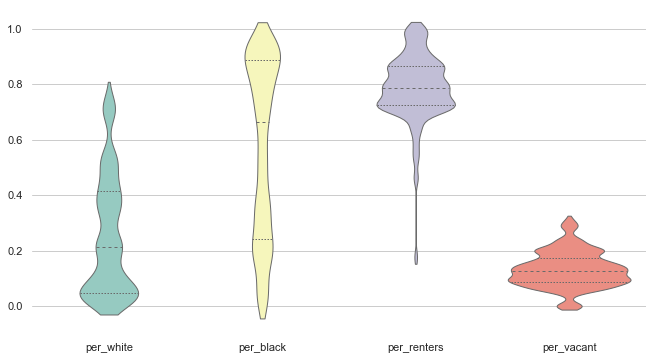

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=morans_hh_census_sub[['per_white','per_black','per_renters', 'per_vacant']],split=True,palette="Set3",  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

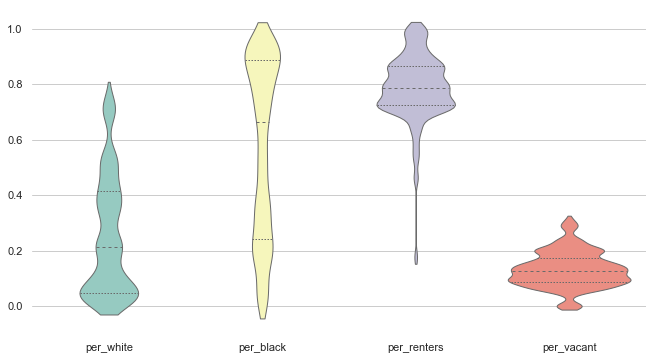

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=morans_hh_census_sub_grouped_years[['per_white','per_black','per_renters', 'per_vacant']],split=True,palette="Set3",  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

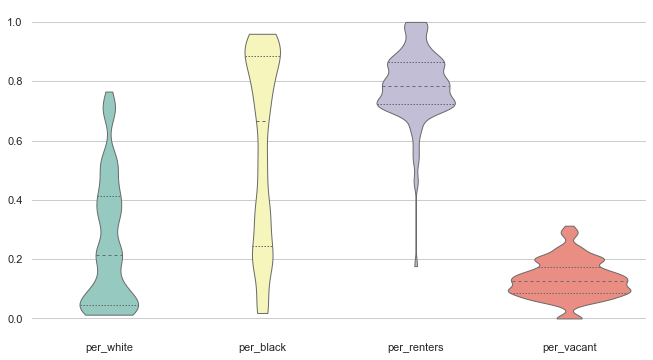

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=morans_hh_census_sub[['per_white','per_black','per_renters', 'per_vacant']],split=True,palette="Set3",  bw=.2, cut=0,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)



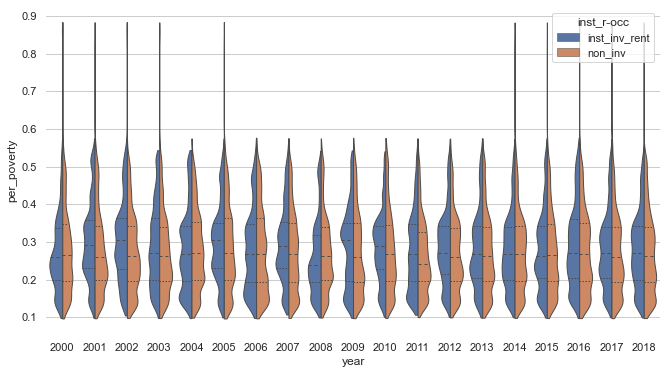

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_poverty',hue='inst_r-occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

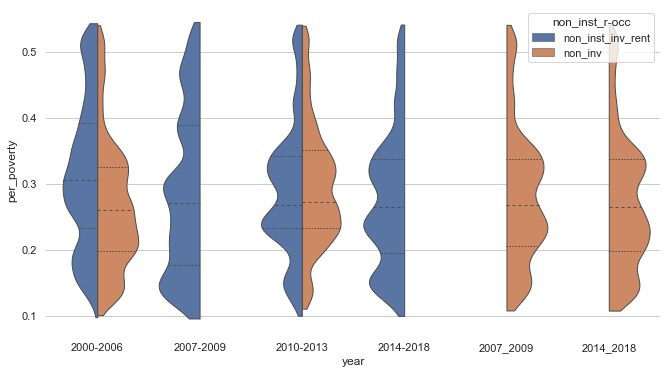

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_poverty',hue='non_inst_r-occ',data=violin0018_grouped_years,split=True,  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

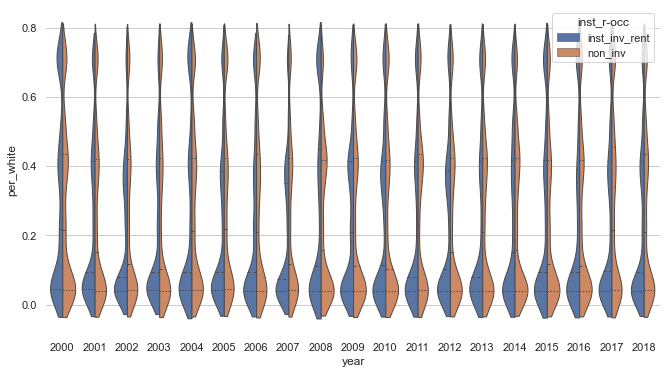

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_white',hue='inst_r-occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

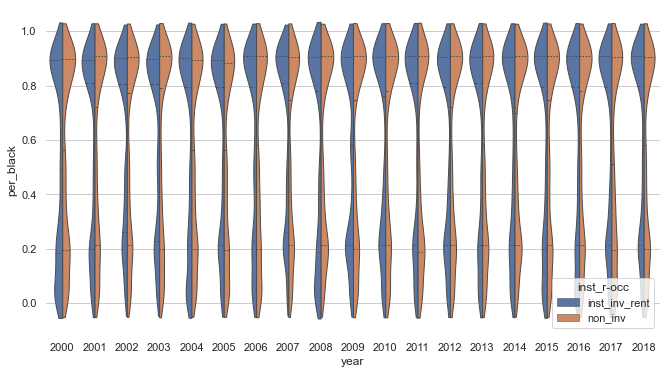

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_black',hue='inst_r-occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

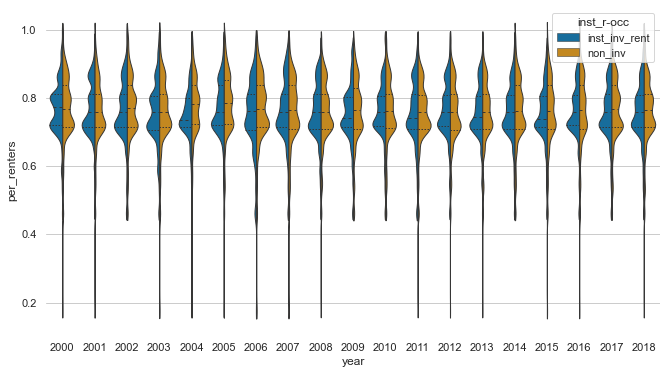

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_renters',hue='inst_r-occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,palette = 'colorblind',inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

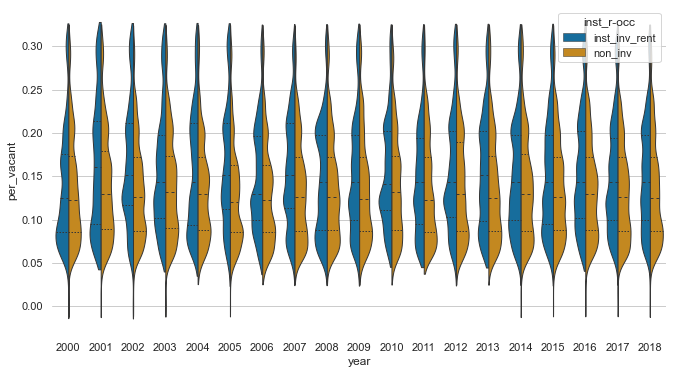

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_vacant',hue='inst_r-occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,palette = 'colorblind',inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

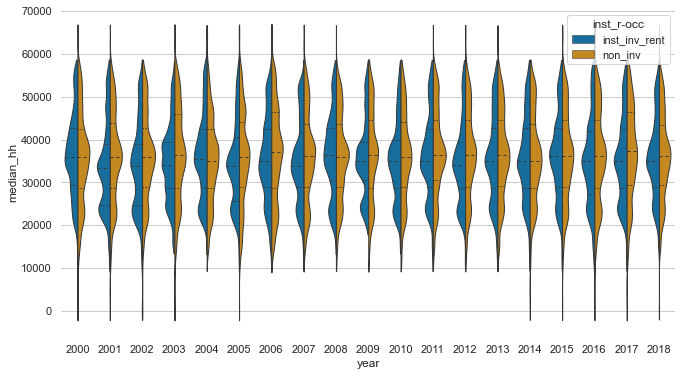

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='median_hh',hue='inst_r-occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,palette = 'colorblind',inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)